In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

# **LSTM**
하나의 큰 셀 안에 4개의 작은 셀을 두고 은닉 상태를 만드는데 기여하는 "셀 상태"라는 새로운 값을 두어 학습률을 높이는 순환신경망

In [18]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
#ML_Learning21에서 만들었던 모델에서 RNN을 LSTM으로 바꾸면 간단히 구현할 수 있다.
#8개의 큰 셀을 가진 LSTM층을 생성후 추가
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()
#RNN에서는 파라미터가 총 200개 있었고, LSTM은 1개의 셀이 4개의 작은 셀을 가지고있기 때문에 200*4해서 800개의 파라미터를 가진다.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6929 - accuracy: 0.5146 - val_loss: 0.6918 - val_accuracy: 0.5464
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6907 - accuracy: 0.5810 - val_loss: 0.6871 - val_accuracy: 0.6270
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6829 - accuracy: 0.6311 - val_loss: 0.6598 - val_accuracy: 0.6074
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6369 - accuracy: 0.6440 - val_loss: 0.6040 - val_accuracy: 0.7352
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5916 - accuracy: 0.7441 - val_loss: 0.5810 - val_accuracy: 0.7474
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5674 - accuracy: 0.7574 - val_loss: 0.5624 - val_accuracy: 0.7570
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5492 - accuracy: 0.7652 - val_loss: 0.5453 - val_accuracy: 0.7662

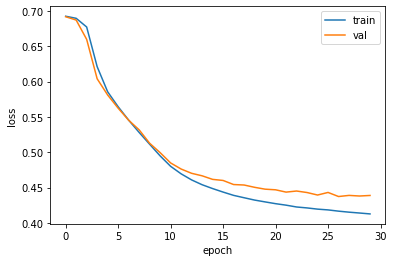

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**드롭아웃**

In [21]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
#셀 상태와 은닉상태의 30퍼센트를 날리는 dropout을 LSTM층에서 실시하도록 추가.
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [22]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 9ms/step - loss: 0.4123 - accuracy: 0.8152 - val_loss: 0.4396 - val_accuracy: 0.7992
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4159 - accuracy: 0.8135 - val_loss: 0.4352 - val_accuracy: 0.8004
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4160 - accuracy: 0.8161 - val_loss: 0.4350 - val_accuracy: 0.7984
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4065 - accuracy: 0.8191 - val_loss: 0.4355 - val_accuracy: 0.7980
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4074 - accuracy: 0.8209 - val_loss: 0.4343 - val_accuracy: 0.7994
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4093 - accuracy: 0.8186 - val_loss: 0.4382 - val_accuracy: 0.7986
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.4087 - accuracy: 0.8187 - val_loss: 0.4319 - val_accuracy: 0.8010

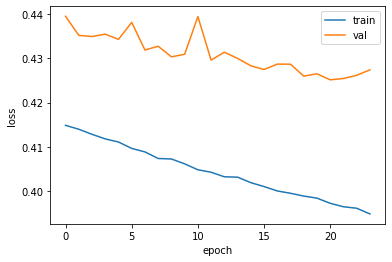

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#? 왜 이렇게 나오는지 모르겠네

# **두개의 순환층 연결하기**

In [24]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
#return_sequences:모든셀의 은닉상태를 다음 층으로 넘길지 결정. 2개 이상의 순환층을 쌓을때는 마지막 순환층을 제외한 모든 순환층에 True로 설정해주어야한다.("순환신경망의 개념" 참조)
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 14ms/step - loss: 0.6929 - accuracy: 0.5186 - val_loss: 0.6918 - val_accuracy: 0.6028
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6906 - accuracy: 0.5966 - val_loss: 0.6844 - val_accuracy: 0.6570
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6744 - accuracy: 0.6737 - val_loss: 0.6069 - val_accuracy: 0.7100
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5845 - accuracy: 0.7116 - val_loss: 0.5410 - val_accuracy: 0.7426
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5353 - accuracy: 0.7444 - val_loss: 0.5149 - val_accuracy: 0.7552
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5091 - accuracy: 0.7597 - val_loss: 0.4923 - val_accuracy: 0.7698
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.4922 - accuracy: 0.7678 - val_loss: 0.4746 - val_accuracy:

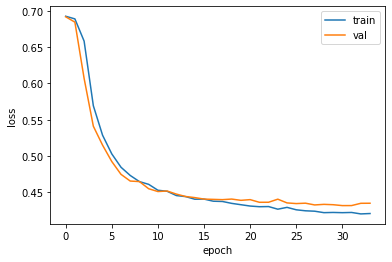

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#상당한 부분 과대적합이 해소된 것을 볼 수 있다.

# **GRU 셀**
하나의 큰 셀 안에 3개의 작은셀을 포함하고 셀 상태를 없애 LSTM을 간소화시킨 순환신경망

In [27]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
#LSTM대신 GRU를 추가하면 손쉽게 GRU모델을 만들 수 있다.
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()
#RNN의 경우 200개의 파라미터에 텐서플로우의 GRU모델은 각 셀마다 은닉상태에 곱해지는 가중치 Wh를 가지기 때문에 8개의 가중치를 추가로 가지며
#GRU모델은 큰 셀안에 작은셀이 3개가 있으므로 총 파라미터 개수는 (200+8)*3해서 624개이다.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 9ms/step - loss: 0.6929 - accuracy: 0.5138 - val_loss: 0.6920 - val_accuracy: 0.5278
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6912 - accuracy: 0.5494 - val_loss: 0.6898 - val_accuracy: 0.5796
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6886 - accuracy: 0.5958 - val_loss: 0.6862 - val_accuracy: 0.5988
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6842 - accuracy: 0.6064 - val_loss: 0.6805 - val_accuracy: 0.6136
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6765 - accuracy: 0.6261 - val_loss: 0.6704 - val_accuracy: 0.6222
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6641 - accuracy: 0.6447 - val_loss: 0.6534 - val_accuracy: 0.6378
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6429 - accuracy: 0.6627 - val_loss: 0.6221 - val_accuracy: 0.6698

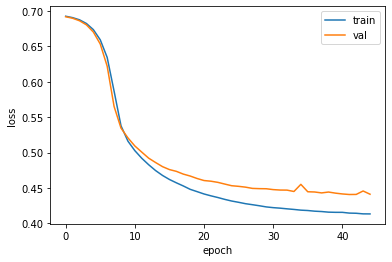

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()